# DRAFT Roster Construction
Analyzing different roster construction patterns and their success rates.

## Libraries

In [1]:
import logging
import sys

import math
import numpy as np
import pandas as pd
from pandas_gbq import read_gbq

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.oauth2 import service_account

## Setup

In [2]:
logger = logging.getLogger('pandas_gbq')
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler(stream=sys.stdout))

In [3]:
PROJECT_ID = 'ad-fantasy-football'
SERVICE_ACCOUNT_PATH = '../credentials/bigquery-loader.json'
BQ_CREDENTIALS = service_account.Credentials.from_service_account_file(
    SERVICE_ACCOUNT_PATH
)

In [4]:
PARAMS = {
    'participants': '12'
}

In [5]:
SQL_BASE = \
"""
SELECT
  CONCAT(CAST(qb_count AS STRING), '-', CAST(rb_count AS STRING), '-', CAST(wr_count AS STRING), '-', CAST(te_count AS STRING)) AS position_counts,
  (CASE WHEN league_rank = 1 THEN 1 ELSE 0 END) AS win_flag,
  *
FROM
  (
    SELECT
      draft_id,
      team_id,
      COUNT(DISTINCT (CASE WHEN position = 'QB' THEN player_id END)) AS qb_count,
      COUNT(DISTINCT (CASE WHEN position = 'RB' THEN player_id END)) AS rb_count,
      COUNT(DISTINCT (CASE WHEN position = 'WR' THEN player_id END)) AS wr_count,
      COUNT(DISTINCT (CASE WHEN position = 'TE' THEN player_id END)) AS te_count,
      COALESCE(SUM(CASE WHEN position = 'QB' AND player_counts THEN fantasy_points END), 0) AS qb_points,
      COALESCE(SUM(CASE WHEN position = 'RB' AND player_counts THEN fantasy_points END), 0) AS rb_points,
      COALESCE(SUM(CASE WHEN position = 'WR' AND player_counts THEN fantasy_points END), 0) AS wr_points,
      COALESCE(SUM(CASE WHEN position = 'TE' AND player_counts THEN fantasy_points END), 0) AS te_points,
      MIN(league_rank) AS league_rank,
      MAX(total_points) AS total_points
    FROM
      `ad-fantasy-football.playdraft_2018.v_full`
    WHERE
      participants = {participants}
    GROUP BY 1, 2
  )
"""

In [6]:
sql_base = SQL_BASE.format(**PARAMS)

df_base = pd.read_gbq(
    query=sql_base,
    project_id=PROJECT_ID,
    dialect='standard',
    credentials=BQ_CREDENTIALS
)

  Elapsed 6.49 s. Waiting...
  Elapsed 7.72 s. Waiting...
  Elapsed 8.86 s. Waiting...
  Elapsed 9.88 s. Waiting...
  Elapsed 11.49 s. Waiting...
  Elapsed 12.55 s. Waiting...
  Elapsed 15.3 s. Waiting...
  Elapsed 16.44 s. Waiting...
  Elapsed 17.78 s. Waiting...
  Elapsed 20.33 s. Waiting...
  Elapsed 21.35 s. Waiting...
  Elapsed 22.38 s. Waiting...
  Elapsed 23.4 s. Waiting...
  Elapsed 24.43 s. Waiting...
  Elapsed 26.88 s. Waiting...
  Elapsed 29.14 s. Waiting...
  Elapsed 30.16 s. Waiting...
  Elapsed 33.0 s. Waiting...
  Elapsed 34.79 s. Waiting...
  Elapsed 36.39 s. Waiting...
  Elapsed 39.58 s. Waiting...
  Elapsed 40.61 s. Waiting...
  Elapsed 41.63 s. Waiting...
  Elapsed 42.82 s. Waiting...
  Elapsed 45.11 s. Waiting...
  Elapsed 46.14 s. Waiting...
  Elapsed 47.16 s. Waiting...
  Elapsed 48.18 s. Waiting...
  Elapsed 51.46 s. Waiting...
  Elapsed 52.48 s. Waiting...
  Elapsed 53.51 s. Waiting...
  Elapsed 54.53 s. Waiting...
  Elapsed 55.55 s. Waiting...
  Elapsed 57.7 s.

In [7]:
df_base.head(30)

,position_counts,win_flag,draft_id,team_id,qb_count,rb_count,wr_count,te_count,qb_points,rb_points,wr_points,te_points,league_rank,total_points
0,3-9-5-1,0,f42f45f1-86ca-4bf3-8f84-7d83409b800b,a85fa278-6d3b-47bc-9f80-4268d6d12d22,3,9,5,1,407.94,457.30,790.70,0.0,7,1655.94
1,2-7-4-5,0,03a665f4-6944-474b-b239-df8c02d31798,8a4d6880-d647-4695-bfe1-a67806639f73,2,7,4,5,299.20,683.20,562.30,188.6,3,1733.30
2,2-7-8-1,0,0480283c-fc25-4a27-980e-45abf536f435,f3ed4b8c-8fb9-4d41-9a0b-6f77300b41fa,2,7,8,1,322.92,570.30,598.70,115.5,10,1607.42
3,2-9-5-2,0,2880f84a-7bab-4002-83ed-ea4a99d188ad,fe37f1b2-1402-49e5-9f98-8192a90f0cf5,2,9,5,2,337.86,609.20,736.84,90.3,3,1774.20
4,3-7-7-1,0,facbb810-4c9d-4c30-98b1-6d0fd8b6f421,795f7a9c-9f27-4b57-8144-200de69b145c,3,7,7,1,258.38,526.60,756.30,7.2,9,1548.48
5,2-6-9-1,0,346af62b-5aed-43f7-9374-04918406d87e,13530c48-56d2-4f7e-90d3-30194b4a43c3,2,6,9,1,430.58,412.50,688.98,219.3,4,1751.36
6,3-6-5-4,0,c25670ab-9d6e-49b0-8508-6d1a224e3399,35b9b8e8-90b6-4ff5-a3e5-9299ec42e3a9,3,6,5,4,405.36,428.74,745.50,272.8,3,1852.40
7,3-7-7-1,0,0cec1e30-0b0c-497f-814c-4f27aa986792,67063e1b-4fe4-4c2f-a8a9-3f2c638fa74a,3,7,7,1,374.32,590.20,652.46,114.3,4,1731.28
8,4-4-8-2,0,ab91df31-ba7c-415a-bc18-2566872692c1,2e4fd65e-b755-48f7-91eb-56d23e69ef5e,4,4,8,2,319.08,433.10,654.50,138.5,9,1545.18
9,1-5-11-1,0,dd27715e-0b33-4301-b187-113ca0f268d5,80370b73-0c4f-4d4c-b3f9-d4750cbde4b4,1,5,11,1,342.58,457.90,793.82,20.5,8,1614.80


## Data Preparation

In [8]:
POINTS_INTERVAL = 10
POSITIONS = ['qb', 'rb', 'wr', 'te']

In [9]:
df_base['total_points_group'] = np.floor(df_base['total_points'] \
                                         / POINTS_INTERVAL) * POINTS_INTERVAL
df_base['qb_points_group'] = np.floor(df_base['qb_points'] \
                                         / POINTS_INTERVAL) * POINTS_INTERVAL
df_base['rb_points_group'] = np.floor(df_base['rb_points'] \
                                         / POINTS_INTERVAL) * POINTS_INTERVAL
df_base['wr_points_group'] = np.floor(df_base['wr_points'] \
                                         / POINTS_INTERVAL) * POINTS_INTERVAL
df_base['te_points_group'] = np.floor(df_base['te_points'] \
                                         / POINTS_INTERVAL) * POINTS_INTERVAL

In [10]:
df_positions = df_base.groupby([
        'position_counts',
        'qb_count',
        'rb_count',
        'wr_count',
        'te_count'
    ], as_index=False).agg({
        'draft_id': 'count',
        'win_flag': 'sum'
    }).rename(columns={
        'draft_id': 'teams',
        'win_flag': 'wins'
    }).sort_values(by='teams', ascending=False)

df_positions['win_rate'] = df_positions['wins'] / df_positions['teams']

In [11]:
df_points = df_base.groupby([
        'total_points_group'
    ], as_index=False).agg({
        'draft_id': 'count',
        'win_flag': 'sum'
    }).rename(columns={
        'draft_id': 'teams',
        'win_flag': 'wins'
    }).sort_values(by='total_points_group', ascending=False)

df_points['win_rate'] = df_points['wins'] / df_points['teams']

In [12]:
def print_win_rates(df, column, threshold):
    print('Win rates for {:s} with threshold of {:d}'.format(column, threshold))
    
    for value in df[column].unique():
        _df = df[df[column] == value]

        _wins = _df['wins'].sum()
        _teams = _df['teams'].sum()

        if _teams >= threshold:
            print('Win rate for {:s} = {:s}: {: >5} / {: >5}, {:.2%}'
                  .format(column, str(value), _wins, _teams, _wins / _teams))
            
    print('\n')

## Analysis

In [13]:
print_win_rates(df_positions, 'qb_count', 100)
print_win_rates(df_positions, 'rb_count', 100)
print_win_rates(df_positions, 'wr_count', 100)
print_win_rates(df_positions, 'te_count', 100)
print_win_rates(df_positions, 'position_counts', 500)

Win rates for qb_count with threshold of 100
Win rate for qb_count = 3: 16530 / 196949, 8.39%
Win rate for qb_count = 2: 12762 / 149776, 8.52%
Win rate for qb_count = 4:   780 / 11037, 7.07%
Win rate for qb_count = 1:   162 /  4329, 3.74%
Win rate for qb_count = 5:    46 /   911, 5.05%
Win rate for qb_count = 6:     3 /   191, 1.57%


Win rates for rb_count with threshold of 100
Win rate for rb_count = 6: 15591 / 180302, 8.65%
Win rate for rb_count = 5:  8233 / 102696, 8.02%
Win rate for rb_count = 7:  4889 / 57162, 8.55%
Win rate for rb_count = 8:   675 /  8764, 7.70%
Win rate for rb_count = 4:   763 / 11088, 6.88%
Win rate for rb_count = 9:    62 /  1561, 3.97%
Win rate for rb_count = 3:    56 /  1151, 4.87%
Win rate for rb_count = 10:     9 /   350, 2.57%
Win rate for rb_count = 2:     6 /   209, 2.87%


Win rates for wr_count with threshold of 100
Win rate for wr_count = 6:  8258 / 99077, 8.33%
Win rate for wr_count = 7: 14130 / 165961, 8.51%
Win rate for wr_count = 8:  5977 / 6980

In [14]:
sns.set(rc={'figure.figsize':(16,9)})

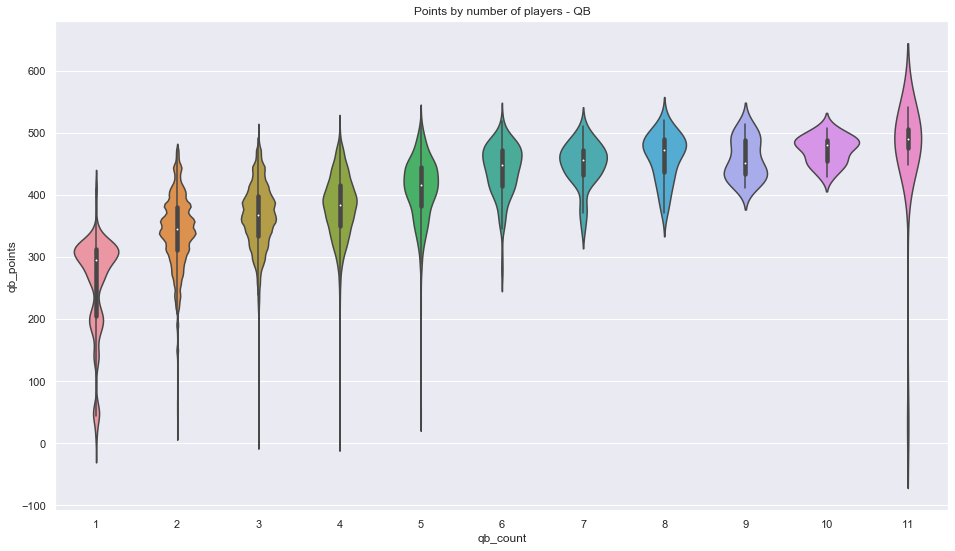

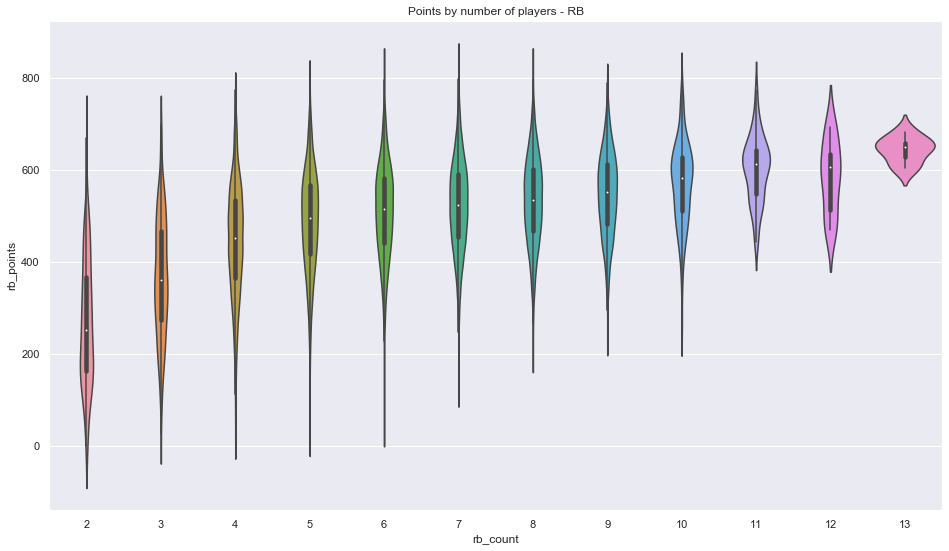

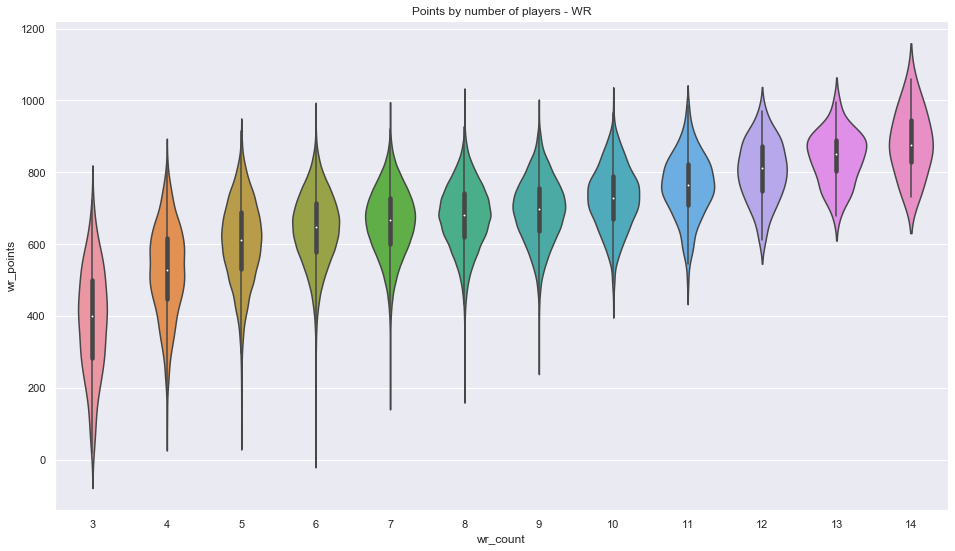

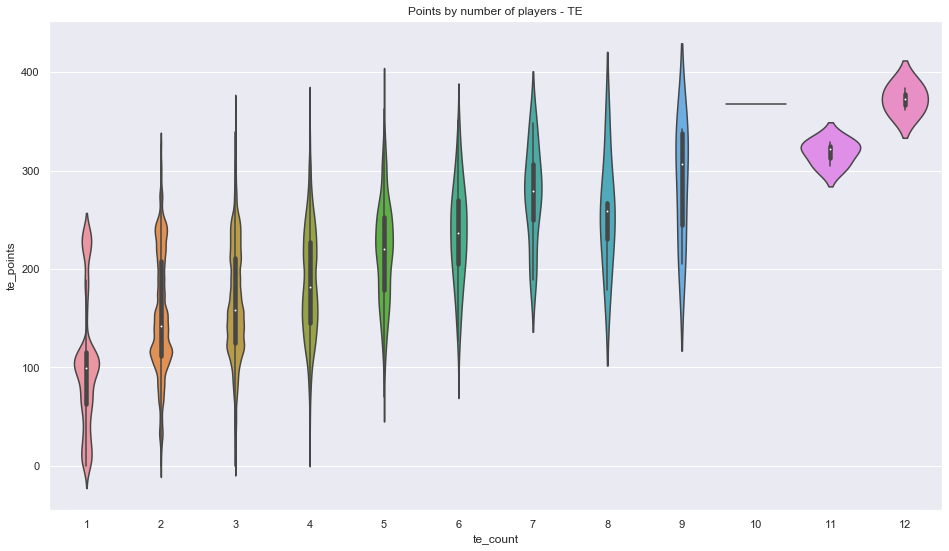

In [15]:
for position in POSITIONS:
    _pos_count = '{}_count'.format(position)
    _pos_points = '{}_points'.format(position)
    
    sns.violinplot(data=df_base, x=_pos_count, y=_pos_points)
    
    plt.title('Points by number of players - {0}'.format(position.upper()))
    plt.show()

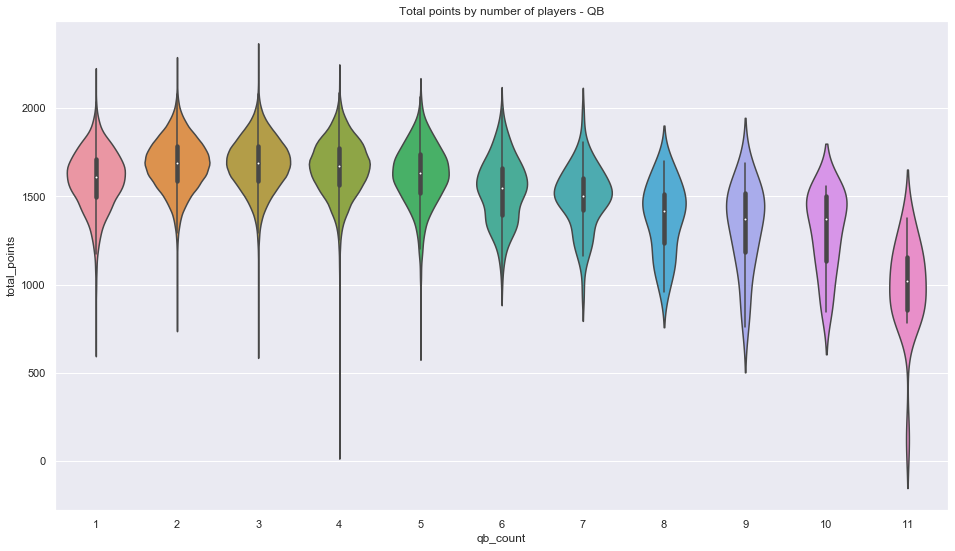

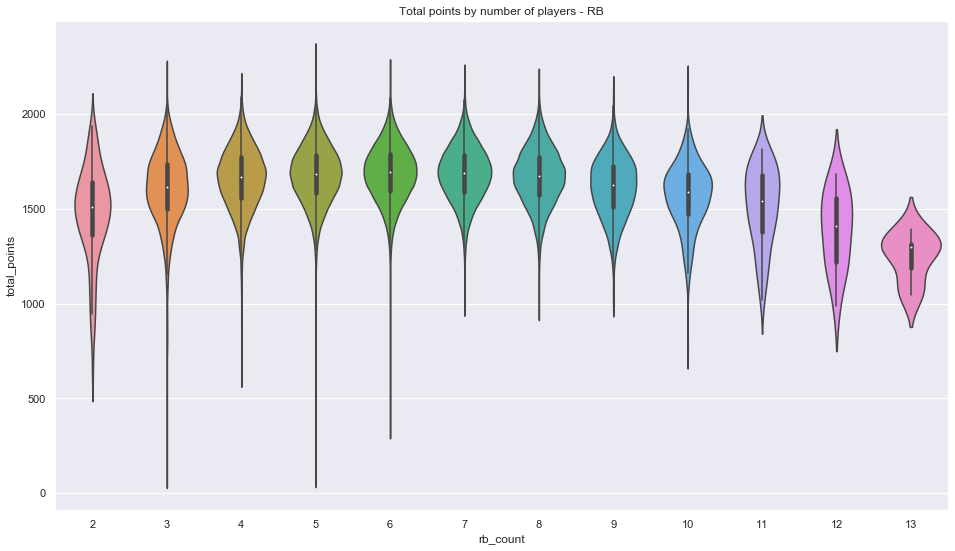

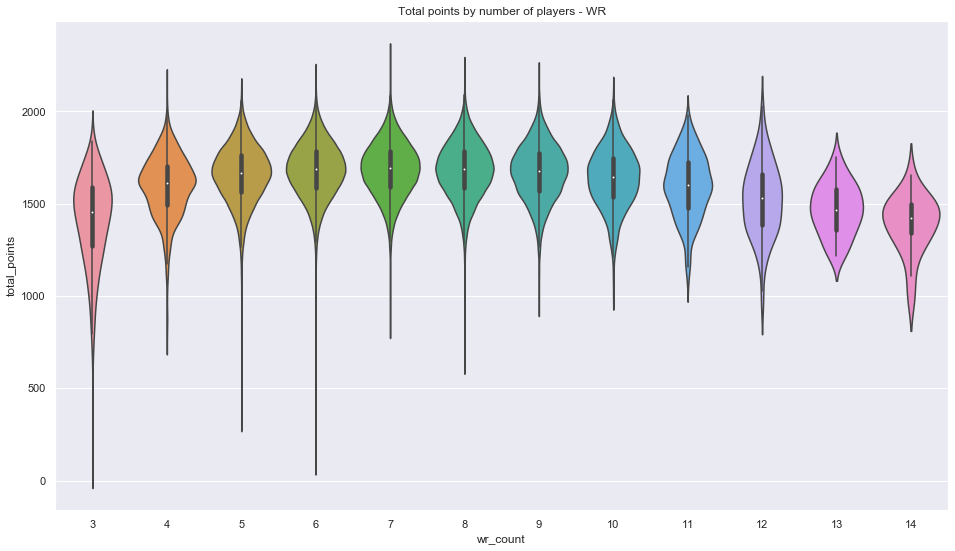

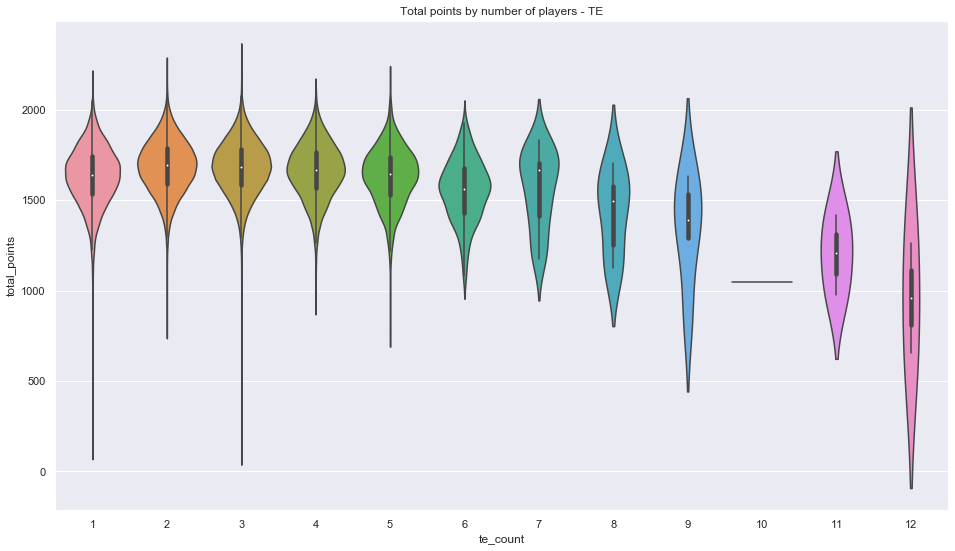

In [16]:
for position in POSITIONS:
    _pos_count = '{}_count'.format(position)
    
    sns.violinplot(data=df_base, x=_pos_count, y='total_points')
    
    plt.title('Total points by number of players - {0}'.format(position.upper()))
    plt.show()

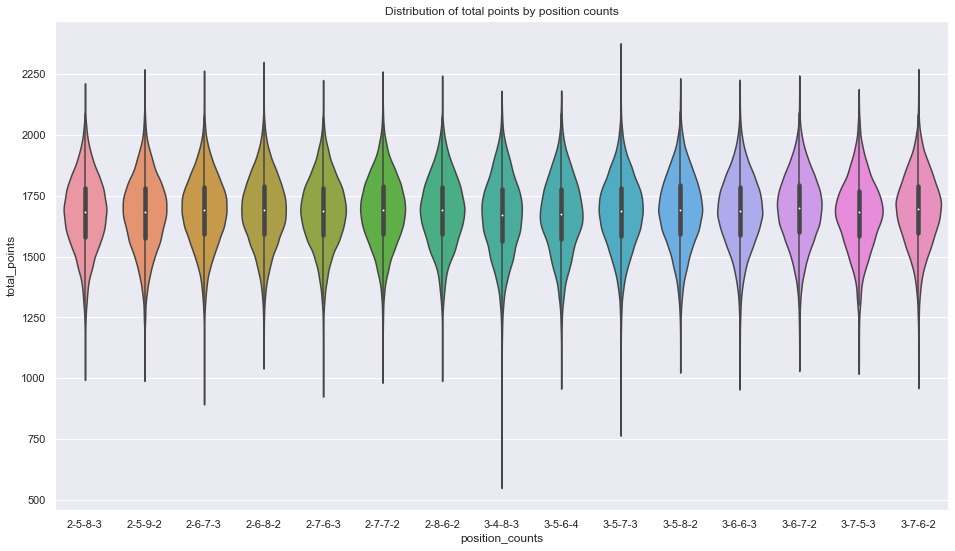

In [17]:
TOP_POS_COUNT = 15
position_counts = list(df_positions.head(TOP_POS_COUNT)['position_counts'])

sns.violinplot(data=df_base[df_base['position_counts'].isin(position_counts)],
               x='position_counts', y='total_points')

plt.title('Distribution of total points by position counts')
plt.show()

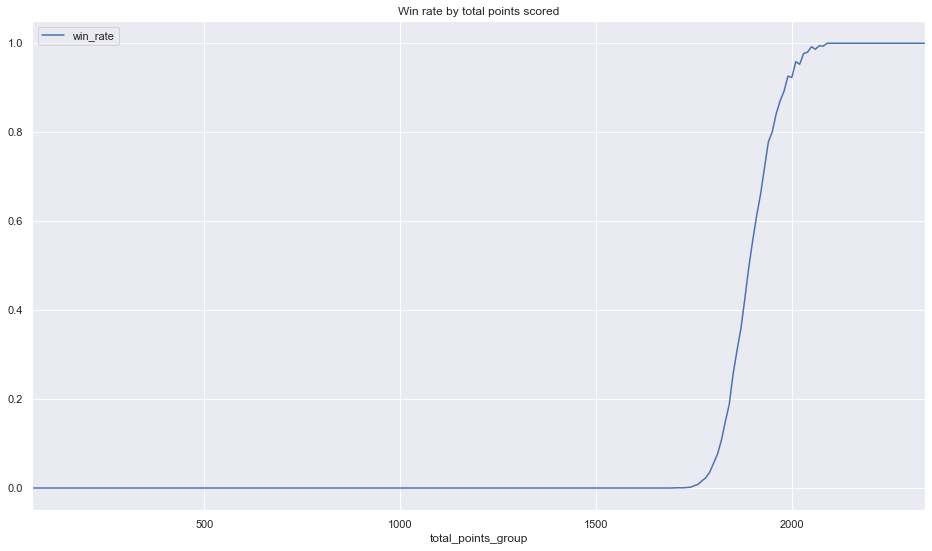

In [18]:
df_points.plot(x='total_points_group', y='win_rate')

plt.title('Win rate by total points scored')
plt.show()

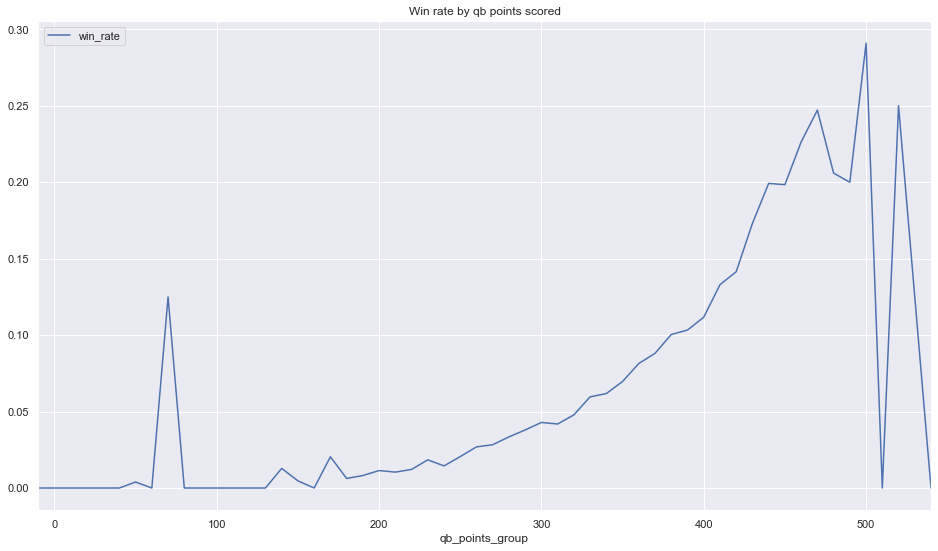

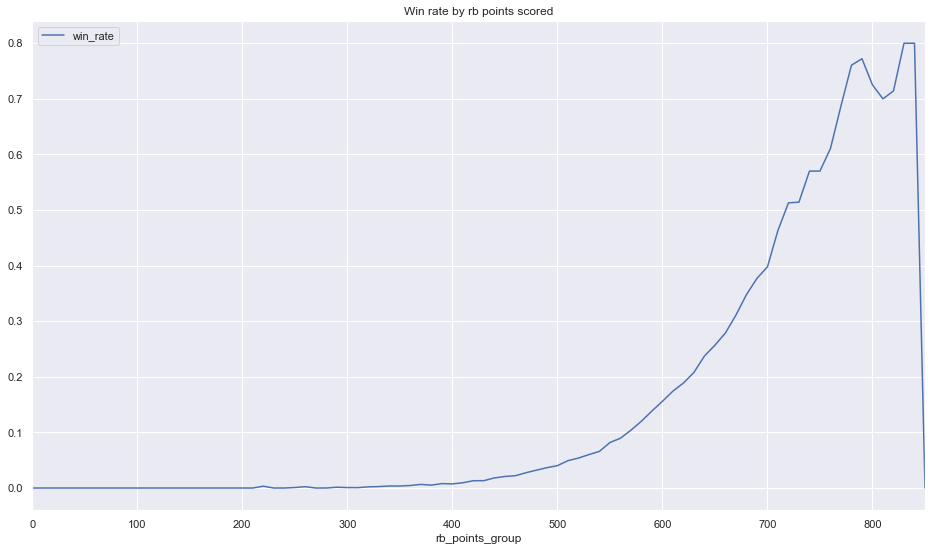

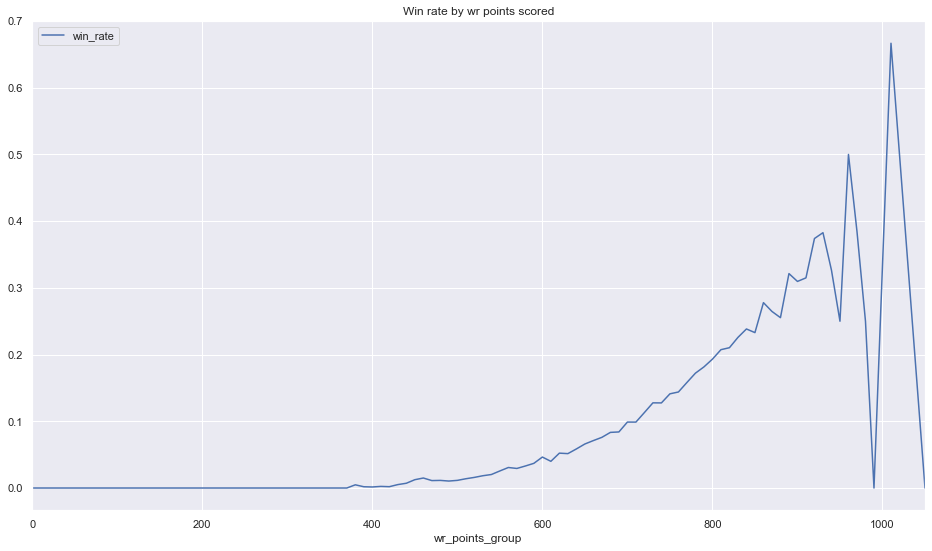

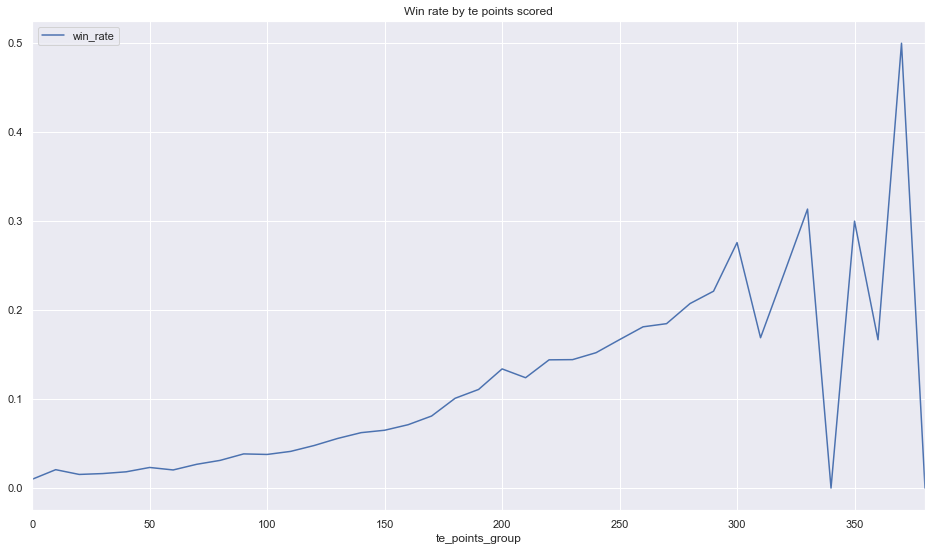

In [19]:
for position in POSITIONS:
    _pos_points_group = '{}_points_group'.format(position)

    _df = df_base.groupby([
        _pos_points_group
    ], as_index=False).agg({
        'draft_id': 'count',
        'win_flag': 'sum'
    }).rename(columns={
        'draft_id': 'teams',
        'win_flag': 'wins'
    })

    _df['win_rate'] = _df['wins'] / _df['teams']

    _df.plot(x=_pos_points_group, y='win_rate')

    plt.title('Win rate by {} points scored'.format(position))
    plt.show()

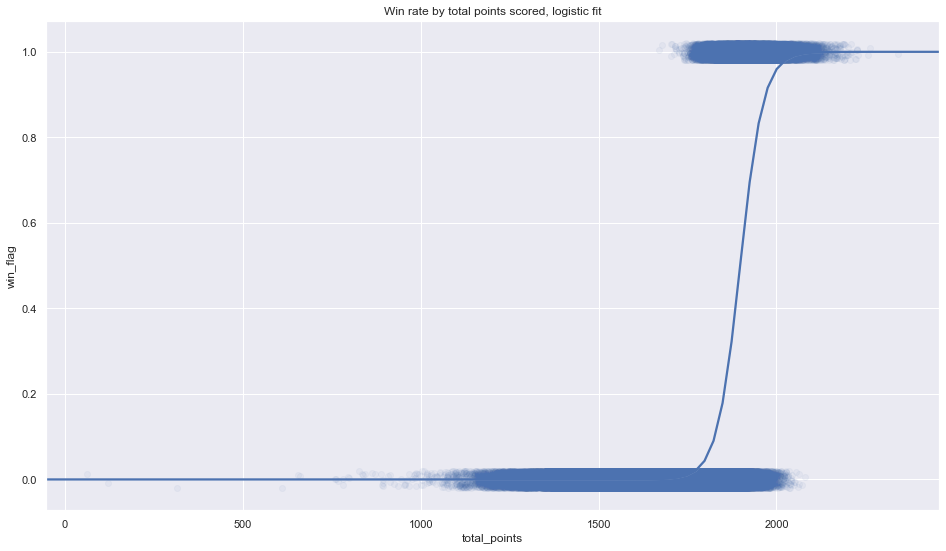

In [20]:
sns.regplot(data=df_base, x='total_points', y='win_flag', y_jitter=0.02,
            n_boot=50, logistic=True, scatter_kws={'alpha': 0.05})

plt.title('Win rate by total points scored, logistic fit')
plt.show()

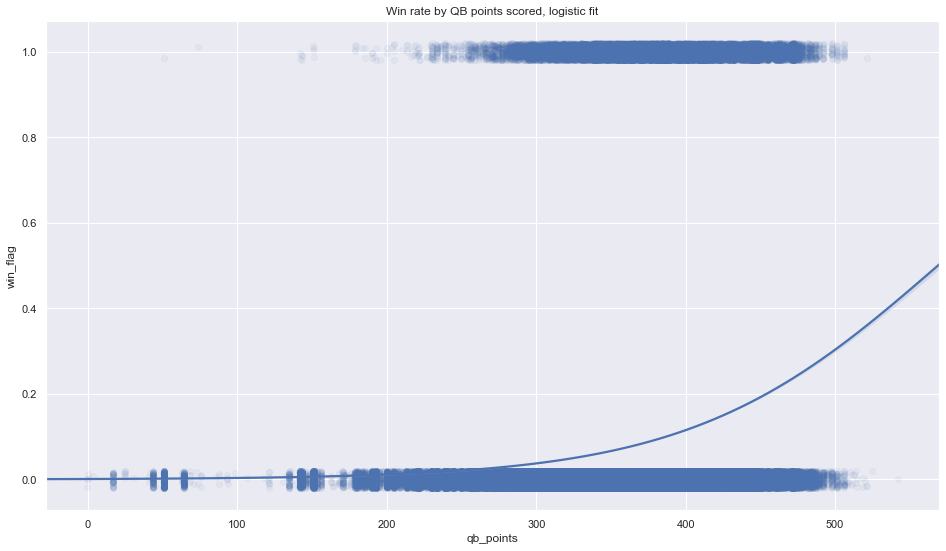

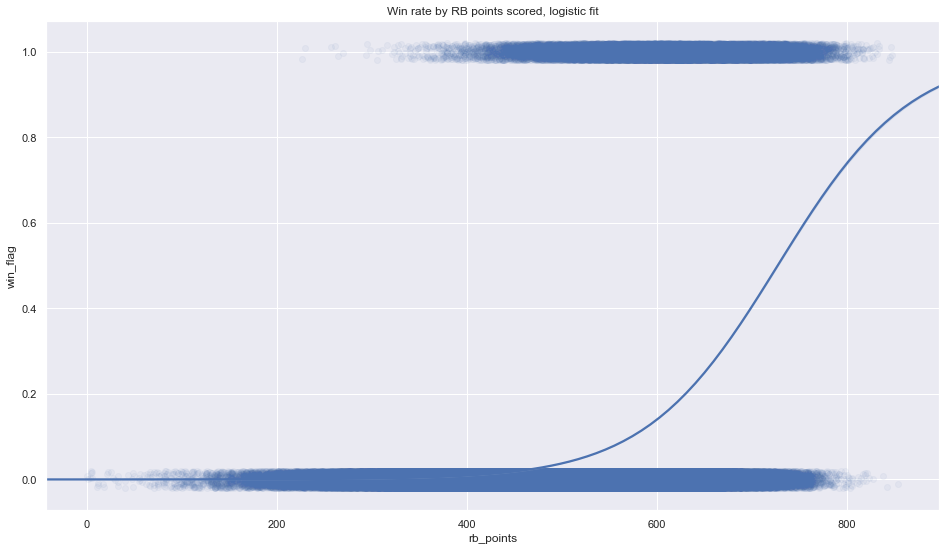

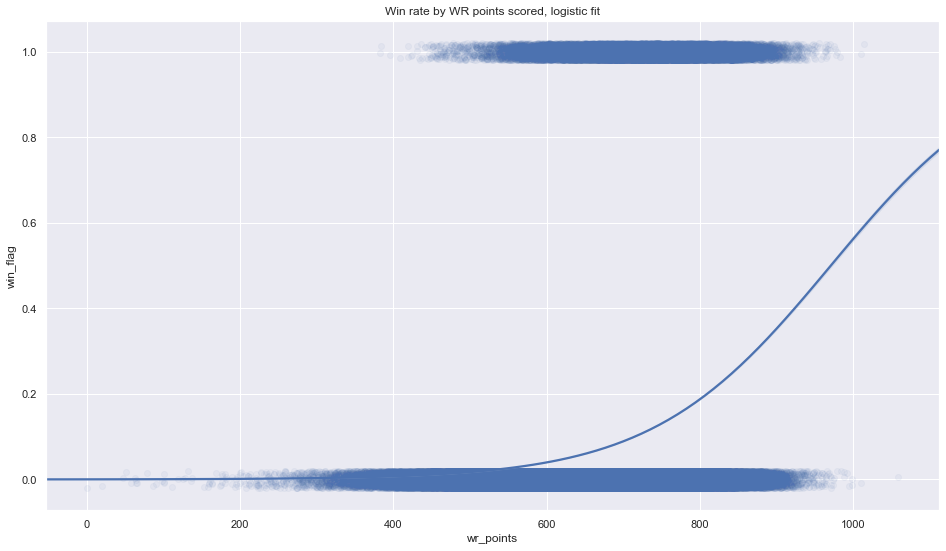

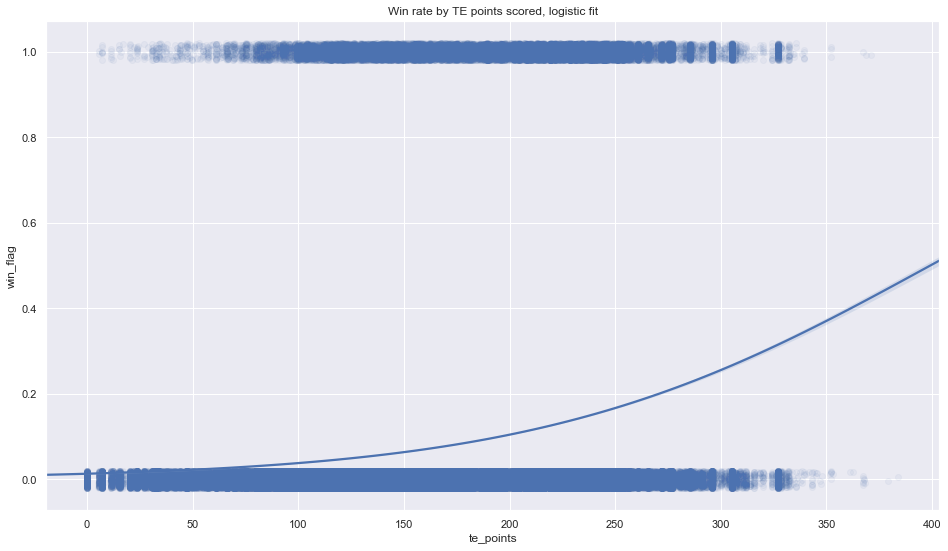

In [21]:
for position in POSITIONS:
    _pos_points = '{}_points'.format(position)
    
    sns.regplot(data=df_base, x=_pos_points, y='win_flag', y_jitter=0.02,
                n_boot=50, logistic=True, scatter_kws={'alpha': 0.05})
    
    plt.title('Win rate by {} points scored, logistic fit'.format(position.upper()))
    plt.show()

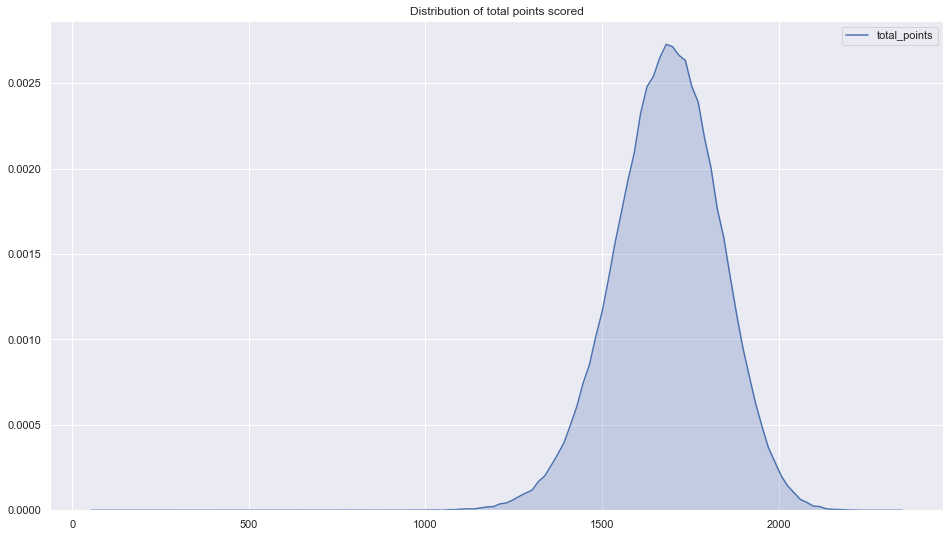

In [22]:
sns.kdeplot(data=df_base['total_points'], bw=3, shade=True)

plt.title('Distribution of total points scored')
plt.show()

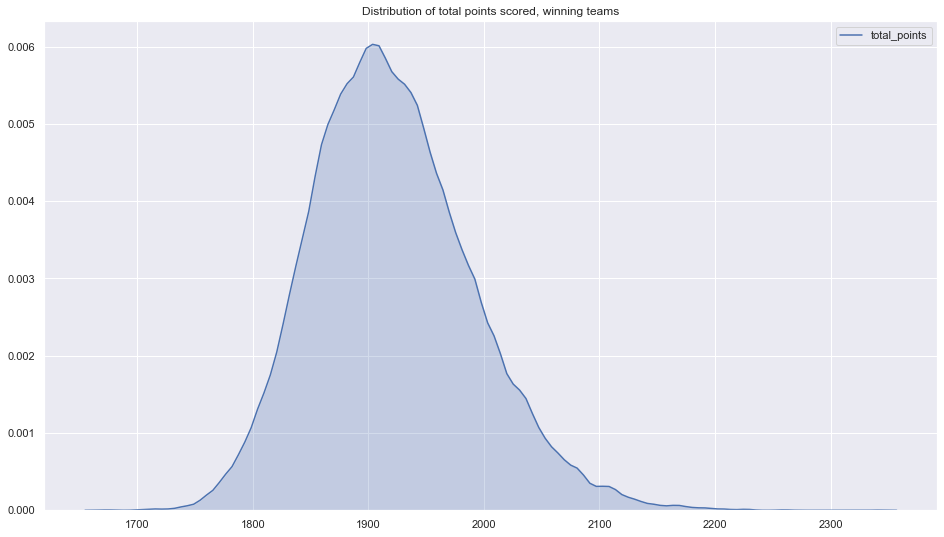

In [23]:
_df = df_base[df_base['win_flag'] == 1]

sns.kdeplot(data=_df['total_points'], bw=5, shade=True)

plt.title('Distribution of total points scored, winning teams')
plt.show()

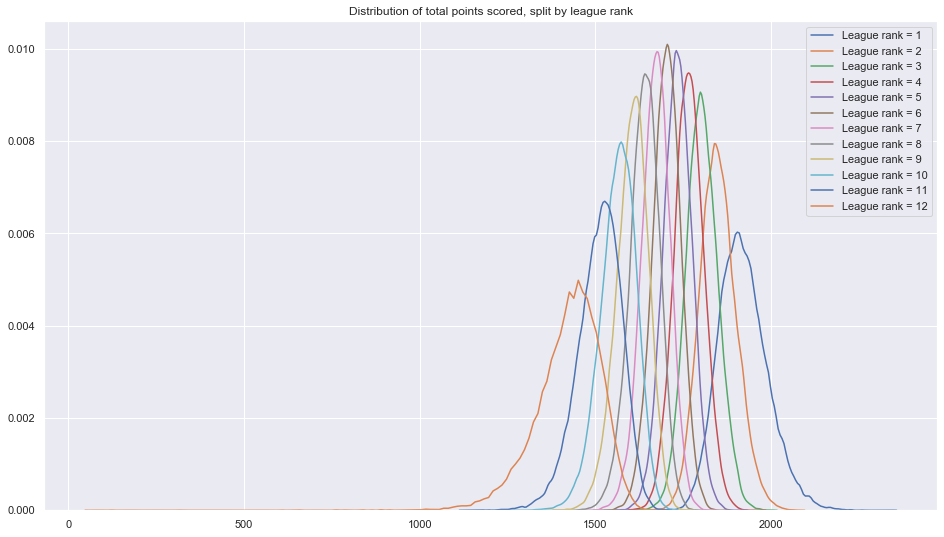

In [24]:
for league_rank in np.sort(df_base['league_rank'].unique()):
    _df = df_base[df_base['league_rank'] == league_rank]
    _label = 'League rank = {}'.format(league_rank)
    
    sns.kdeplot(data=_df['total_points'], bw=5, shade=False, label=_label)

plt.title('Distribution of total points scored, split by league rank')
plt.show()

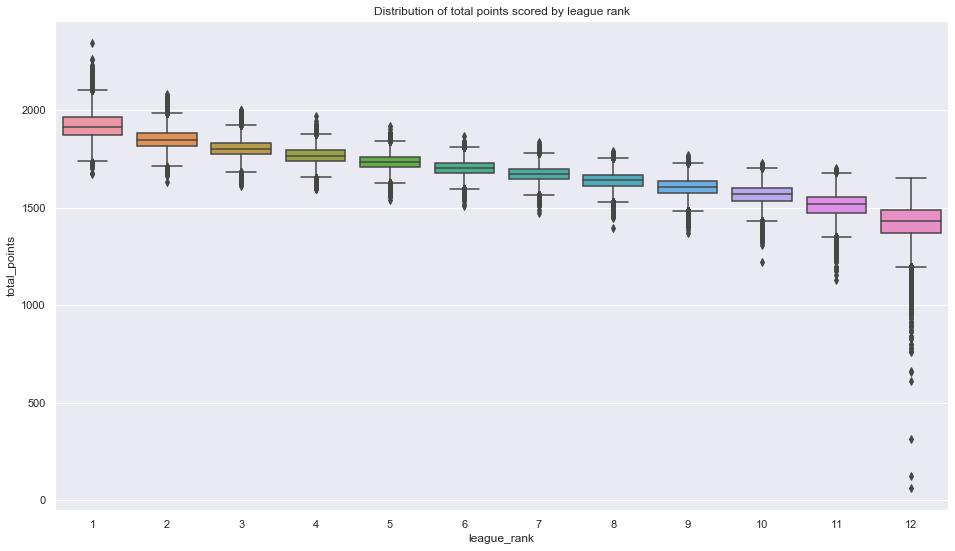

In [25]:
sns.boxplot(data=df_base, x='league_rank', y='total_points')

plt.title('Distribution of total points scored by league rank')
plt.show()

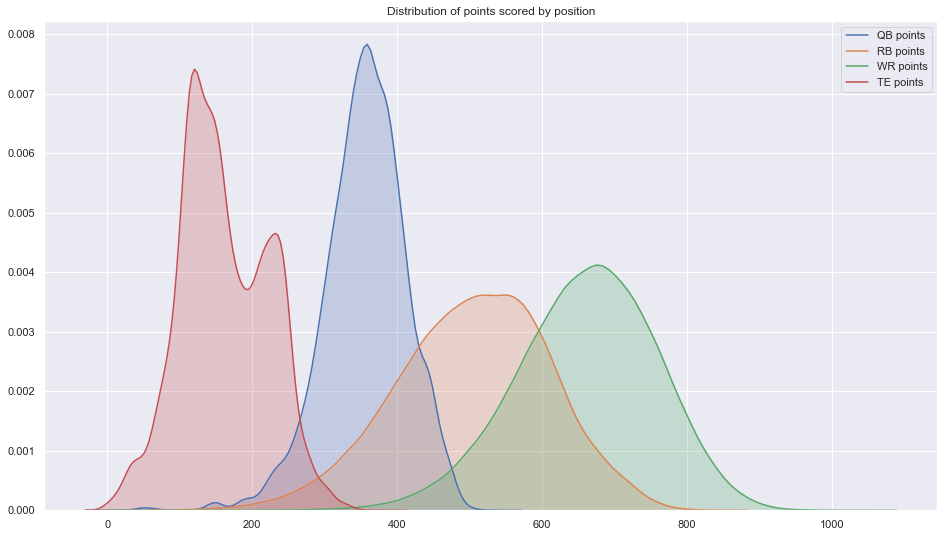

In [26]:
for position in POSITIONS:
    _pos_points = '{}_points'.format(position)
    _label = '{} points'.format(position.upper())

    sns.kdeplot(data=df_base[_pos_points], bw=10, shade=True, label=_label)
    
plt.title('Distribution of points scored by position')
plt.show()

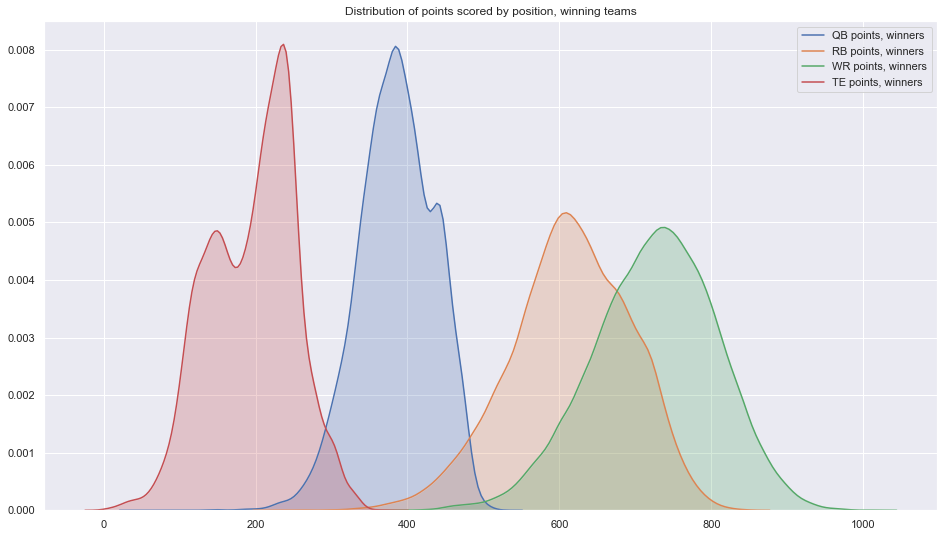

In [27]:
for position in POSITIONS:
    _pos_points = '{}_points'.format(position)
    _label = '{} points, winners'.format(position.upper())
    _df = df_base[df_base['win_flag'] == 1]

    sns.kdeplot(data=_df[_pos_points], bw=10, shade=True, label=_label)

plt.title('Distribution of points scored by position, winning teams')
plt.show()

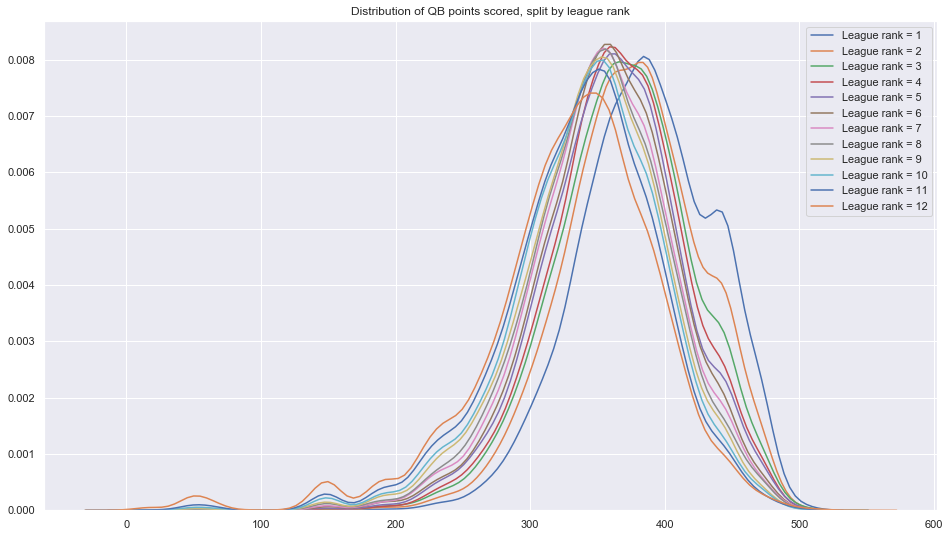

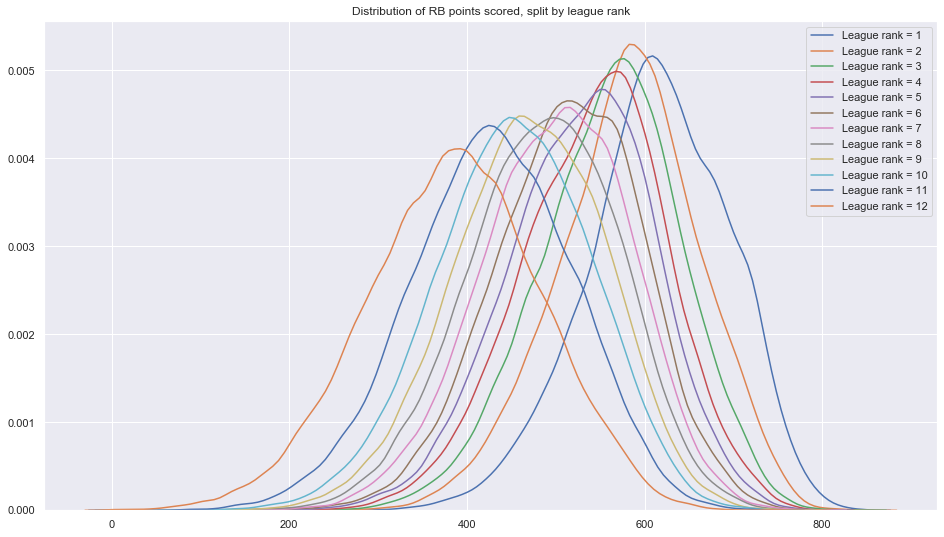

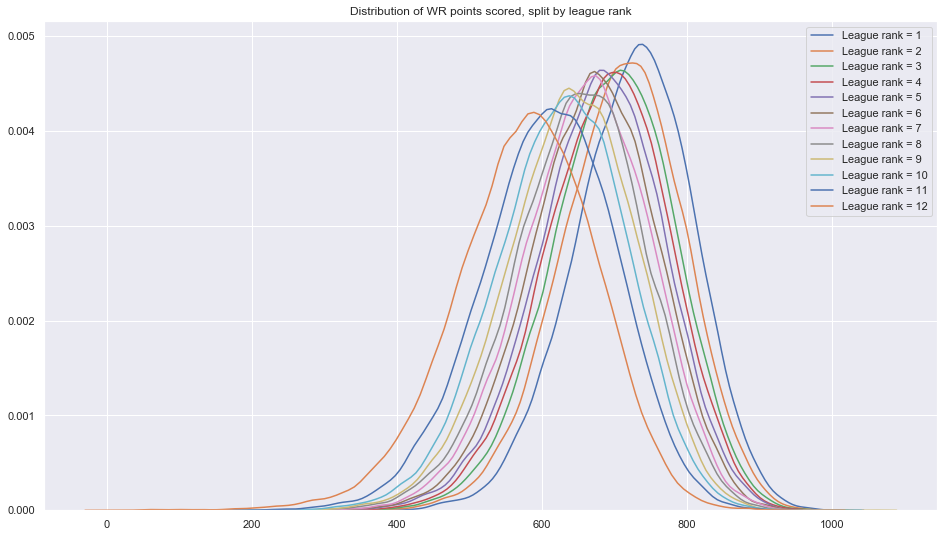

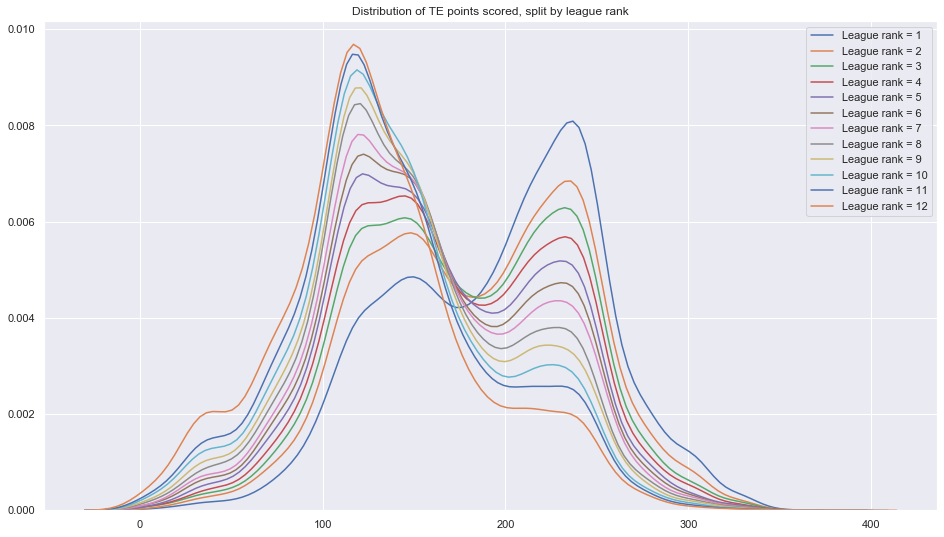

In [28]:
for position in POSITIONS:
    _pos_points = '{}_points'.format(position)
    
    for league_rank in np.sort(df_base['league_rank'].unique()):
        _df = df_base[df_base['league_rank'] == league_rank]
        _label = 'League rank = {}'.format(league_rank)

        sns.kdeplot(data=_df[_pos_points], bw=10, label=_label)

    plt.title('Distribution of {} points scored, split by league rank'.format(position.upper()))
    plt.show()

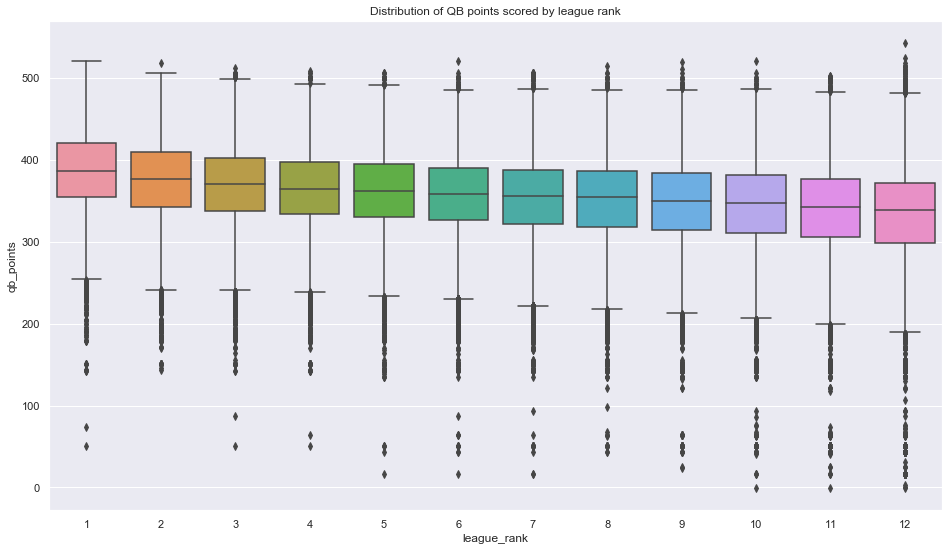

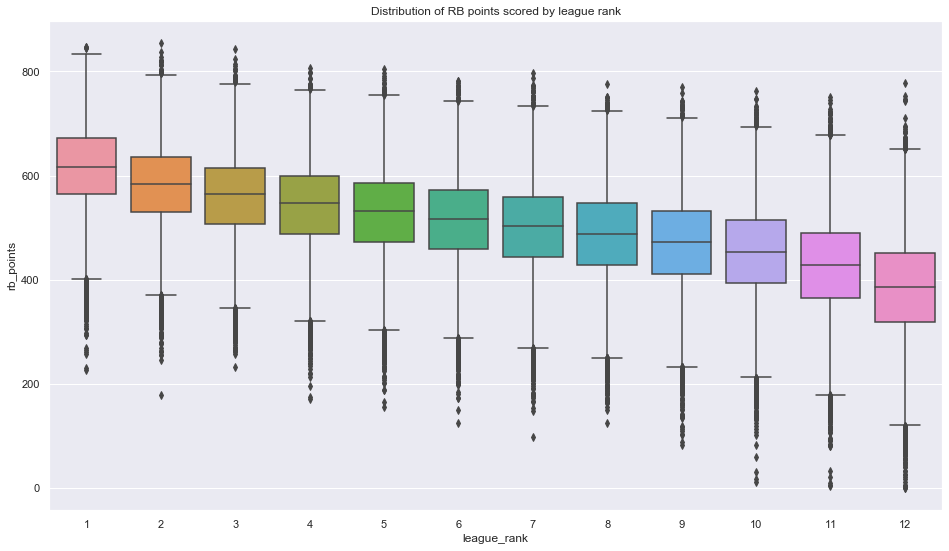

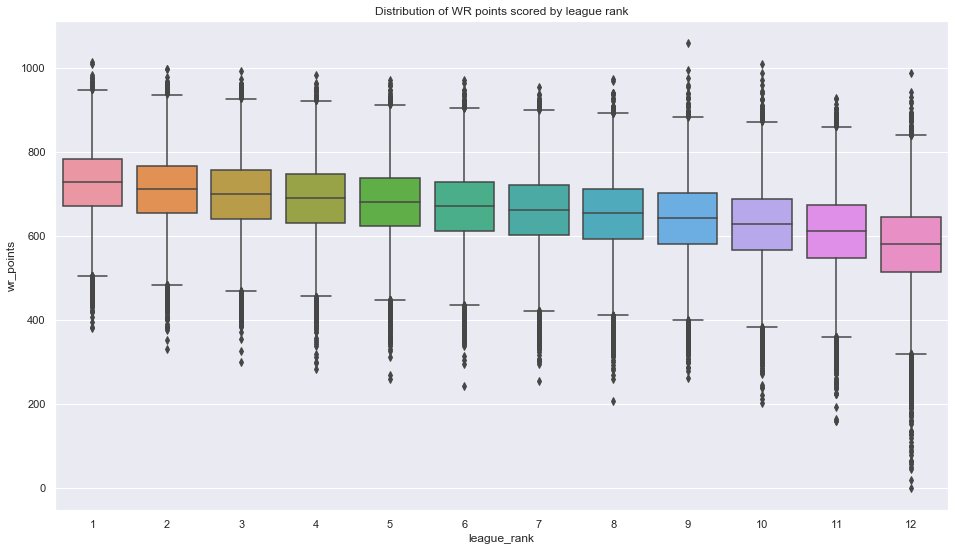

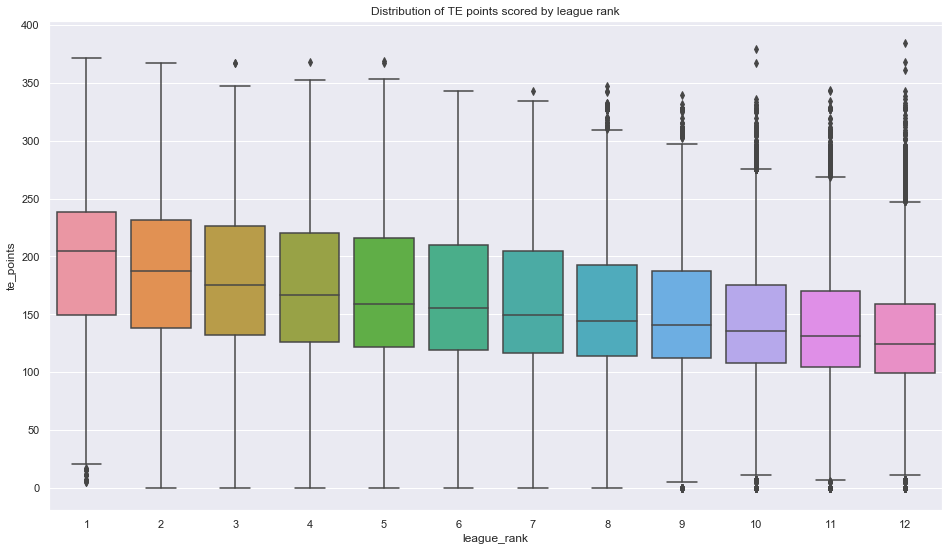

In [29]:
for position in POSITIONS:
    _pos_points = '{}_points'.format(position)
    
    sns.boxplot(data=df_base, x='league_rank', y=_pos_points)

    plt.title('Distribution of {} points scored by league rank'.format(position.upper()))
    plt.show()